## DATA IMPORT

In [19]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor 
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score, accuracy_score
from sklearn.pipeline import make_pipeline

In [3]:
df = pd.read_csv('address_cleaned.csv')
df

,Entrenamiento,Email,Precios US,Ubicacion,Incluye pasantia,Metodo de pago,Estatus laboral,Razon de eleccion del bootcamp,Proveedores de bootcamp,Horario de los bootcamps,Egresado_Activo,Egresado_Egresado,Egresado_Retirado,Primer contacto_Instagram,Primer contacto_WhatsApp,Condiciones de pago_Completo,Condiciones de pago_Cuotas
0,Bootcamp en Desarrollo Web con C#,gmail.com,2900.0,Distrito Nacional,0,Transferencia,1,Crecimiento laboral,Maestros de Talendig,"Lunes, miércoles y viernes de 6:00pm a 8:00 pm",0.0,1.0,0.0,1.0,0.0,0.0,1.0
1,Bootcamp en Desarrollo Web con C#,gmail.com,2900.0,Santo Domingo Este,0,Transferencia,1,Crecimiento laboral,Maestros de Talendig,"Lunes, miércoles y viernes de 6:00pm a 8:00 pm",0.0,0.0,1.0,1.0,0.0,0.0,1.0
2,Bootcamp en Desarrollo Web con C#,gmail.com,2900.0,Distrito Nacional,0,Transferencia,1,Crecimiento laboral,Maestros de Talendig,"Lunes, miércoles y viernes de 6:00pm a 8:00 pm",0.0,1.0,0.0,1.0,0.0,0.0,1.0
3,Bootcamp en Desarrollo Web con Java,gmail.com,2900.0,Distrito Nacional,0,Transferencia,0,Crecimiento laboral,Maestros de Talendig,"Martes, jueves y viernes de 6:00 pm a 8:00 pm",0.0,0.0,1.0,1.0,0.0,0.0,1.0
4,Bootcamp en Desarrollo Web con Java,gmail.com,2900.0,Boca Chica,0,Transferencia,1,Crecimiento laboral,Maestros de Talendig,"Martes, jueves y viernes de 6:00 pm a 8:00 pm",0.0,1.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,Bootcamp en Desarrollo Web,gmail.com,2900.0,Santo Domingo Este,0,Transferencia,0,Aprender algo nuevo,Maestros de Talendig,"Luner, miércoles y viernes de 8: pm a 10:00 pm",1.0,0.0,0.0,1.0,0.0,0.0,1.0
156,Bootcamp en Desarrollo Web,gmail.com,2900.0,Santo Domingo Este,0,Transferencia,0,Aprender algo nuevo,Maestros de Talendig,"Luner, miércoles y viernes de 8: pm a 10:00 pm",1.0,0.0,0.0,1.0,0.0,0.0,1.0
157,Bootcamp en Data Science y Machine Learning en...,gmail.com,2900.0,Distrito Nacional,1,Transferencia,0,Aprender algo nuevo,Maestros de Talendig,"Martes, Jueves y Sábados",1.0,0.0,0.0,0.0,1.0,0.0,1.0
158,Bootcamp en Data Science y Machine Learning en...,hotmail.com,2900.0,Distrito Nacional,1,Transferencia,0,Aprender algo nuevo,Maestros de Talendig,"Martes, Jueves y Sábados",1.0,0.0,0.0,0.0,1.0,0.0,1.0


In [5]:
df["Egresado_Activo"].value_counts()

0.0    142
1.0     18
Name: Egresado_Activo, dtype: int64

Se eliminara la columna de egresados activos porque no existe una correlacion con el la columna objetivo. 

In [4]:
df = df.drop(df.loc[df["Egresado_Activo"] == 1].index)

In [5]:
df["Egresado_Activo"].value_counts()

0.0    142
Name: Egresado_Activo, dtype: int64

In [6]:
df1=df.drop(columns=["Egresado_Activo","Egresado_Retirado"])
df1.head()

,Entrenamiento,Email,Precios US,Ubicacion,Incluye pasantia,Metodo de pago,Estatus laboral,Razon de eleccion del bootcamp,Proveedores de bootcamp,Horario de los bootcamps,Egresado_Egresado,Primer contacto_Instagram,Primer contacto_WhatsApp,Condiciones de pago_Completo,Condiciones de pago_Cuotas
0,Bootcamp en Desarrollo Web con C#,gmail.com,2900.0,Distrito Nacional,0,Transferencia,1,Crecimiento laboral,Maestros de Talendig,"Lunes, miércoles y viernes de 6:00pm a 8:00 pm",1.0,1.0,0.0,0.0,1.0
1,Bootcamp en Desarrollo Web con C#,gmail.com,2900.0,Santo Domingo Este,0,Transferencia,1,Crecimiento laboral,Maestros de Talendig,"Lunes, miércoles y viernes de 6:00pm a 8:00 pm",0.0,1.0,0.0,0.0,1.0
2,Bootcamp en Desarrollo Web con C#,gmail.com,2900.0,Distrito Nacional,0,Transferencia,1,Crecimiento laboral,Maestros de Talendig,"Lunes, miércoles y viernes de 6:00pm a 8:00 pm",1.0,1.0,0.0,0.0,1.0
3,Bootcamp en Desarrollo Web con Java,gmail.com,2900.0,Distrito Nacional,0,Transferencia,0,Crecimiento laboral,Maestros de Talendig,"Martes, jueves y viernes de 6:00 pm a 8:00 pm",0.0,1.0,0.0,0.0,1.0
4,Bootcamp en Desarrollo Web con Java,gmail.com,2900.0,Boca Chica,0,Transferencia,1,Crecimiento laboral,Maestros de Talendig,"Martes, jueves y viernes de 6:00 pm a 8:00 pm",1.0,1.0,0.0,0.0,1.0


In [9]:
df1.shape

(142, 15)

In [7]:
df1.isna().sum()

Entrenamiento                     0
Email                             0
Precios US                        0
Ubicacion                         0
Incluye pasantia                  0
Metodo de pago                    0
Estatus laboral                   0
Razon de eleccion del bootcamp    0
Proveedores de bootcamp           0
Horario de los bootcamps          0
Egresado_Egresado                 0
Primer contacto_Instagram         0
Primer contacto_WhatsApp          0
Condiciones de pago_Completo      0
Condiciones de pago_Cuotas        0
dtype: int64

## TRAIN TEST SPLIT

In [127]:
from sklearn.model_selection import train_test_split

X = df1.drop('Egresado_Egresado', axis=1)
y = df1['Egresado_Egresado']

# Dividir los datos en conjuntos de entrenamiento, validación y prueba
# Primero, dividimos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Luego, dividimos el conjunto de prueba en validación y prueba
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42, stratify=y_test)

# Verificar los tamaños de los conjuntos resultantes
print("Tamaño del conjunto de entrenamiento (X_train):", len(X_train))
print("Tamaño del conjunto de validación (X_val):", len(X_val))
print("Tamaño del conjunto de prueba (X_test):", len(X_test))
print("Tamaño del conjunto de entrenamiento (y_train):", len(y_train))
print("Tamaño del conjunto de validación (y_val):", len(y_val))
print("Tamaño del conjunto de prueba (y_test):", len(y_test))

Tamaño del conjunto de entrenamiento (X_train): 99
Tamaño del conjunto de validación (X_val): 21
Tamaño del conjunto de prueba (X_test): 22
Tamaño del conjunto de entrenamiento (y_train): 99
Tamaño del conjunto de validación (y_val): 21
Tamaño del conjunto de prueba (y_test): 22


In [128]:
X_test.shape

(22, 14)

In [129]:
X_train.shape

(99, 14)

## PREPROCESING

In [8]:
y = df1['Egresado_Egresado']
X = df1.drop(columns='Egresado_Egresado')

X_train, X_test, y_train, y_test =  train_test_split(X,y, random_state=42)

In [9]:
#Selectores
cat_selector = make_column_selector(dtype_include='object')
num_selector = make_column_selector(dtype_include='number')

#Escaladores
scaler = StandardScaler()
ohe = OneHotEncoder(handle_unknown='ignore')

#Pipe
num_tuple = (scaler, num_selector)
cat_tuple = (ohe, cat_selector)

#Transform
col_transformer = make_column_transformer(num_tuple, cat_tuple, remainder = 'passthrough')

#Fit
col_transformer.fit(X_train)
# transform train and test
X_train_processed = col_transformer.transform(X_train)
X_test_processed = col_transformer.transform(X_test)

In [10]:
print("X_train shape: ",X_train_processed.shape)
print("X_test shape: ",X_test_processed.shape)

X_train shape:  (106, 46)
X_test shape:  (36, 46)


## Modelos

In [40]:
class Models:

    def __init__(self,Xtrain_processed,Xtest_processed, ytrain, ytest):

        self.xtrain = Xtrain_processed
        self.xtest = Xtest_processed
        self.ytrain = ytrain
        self.ytest = ytest

  
    def randomForestModel(self,estimators=100,depth=1):
    
        for inc in range(0,depth):
            
            lgreg = RandomForestClassifier (n_estimators=estimators, max_depth=inc+1, random_state = 42)
            lgreg.fit(self.xtrain,self.ytrain)

            X_train_lg = lgreg.score(self.xtrain, self.ytrain)
            X_test_lg = lgreg.score(self.xtest, self.ytest)
            
            pred = lgreg.predict(self.xtest)
            accuracy = accuracy_score(self.ytest, pred)

            print('\n************Max depth #',inc+1,'**************')
            print('\nAccuracy :',X_train_lg, '\n')
            print('\nRendimiendo datos de entremaniento:',X_train_lg, '\n')
            print('Rendimiendo datos de prueba:', X_test_lg, '\n')
            # print(' R2 coeficiente de los datos de entrenamiento: ',r2_score(self.ytest, pred),'\n')       para modelos de regresion no de clasificacion
            print('\nMean absolute error: \n',mean_absolute_error(pred,self.ytest))
            print('\nMean squared error: \n',mean_squared_error(pred,self.ytest))
            print('\nResidual sum of squares: \n',mean_squared_error(pred,self.ytest) * len(pred))
            print('\nRoot Mean Squared Error: \n',mean_squared_error(pred,self.ytest, squared=False))
            print('Predicciones de los datos de entrenamiento: \n\n',pred)

        return pred, X_train_lg, X_test_lg, mean_absolute_error(pred,self.ytest), mean_squared_error(pred,self.ytest), (mean_squared_error(pred,self.ytest) * len(pred)), mean_squared_error(pred,self.ytest, squared=False)
        
    def knn(self,neighbors=1):

        for inc in range(0,neighbors):
            knn =  KNeighborsRegressor(n_neighbors=inc+1)
            knn.fit(self.xtrain, y_train)
            knn_score_train = knn.score(self.xtrain, self.ytrain)
            knn_score_test = knn.score(self.xtest, self.ytest)
            
            knn_predict =  knn.predict(self.xtest)
            knn_accuracy = accuracy_score(self.ytest,knn_predict)
            print('\n************N neighbors #',inc+1,'**************')
            print('\nRendimiendo datos de entremaniento:',knn_score_train, '\n')
            print('Rendimiendo datos de prueba:', knn_score_test, '\n')
            print('Predicciones de los datos de entrenamiento: \n\n',knn_predict)
            print('Precicion de los datos : \n\n',knn_accuracy)

        return knn_predict

chooseModel = Models(X_train_processed,X_test_processed, y_train, y_test)

In [41]:
pred, performance_Xtrain, performance_Xtest, meanAbsoluteError, meanEquaredError, nResidual, RootMeanSquaredError = chooseModel.randomForestModel(100,8)


************Max depth # 1 **************

Accuracy : 0.8207547169811321 


Rendimiendo datos de entremaniento: 0.8207547169811321 

Rendimiendo datos de prueba: 0.8333333333333334 


Mean absolute error: 
 0.16666666666666666

Mean squared error: 
 0.16666666666666666

Residual sum of squares: 
 6.0

Root Mean Squared Error: 
 0.408248290463863
Predicciones de los datos de entrenamiento: 

 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]

************Max depth # 2 **************

Accuracy : 0.8207547169811321 


Rendimiendo datos de entremaniento: 0.8207547169811321 

Rendimiendo datos de prueba: 0.8333333333333334 


Mean absolute error: 
 0.16666666666666666

Mean squared error: 
 0.16666666666666666

Residual sum of squares: 
 6.0

Root Mean Squared Error: 
 0.408248290463863
Predicciones de los datos de entrenamiento: 

 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1

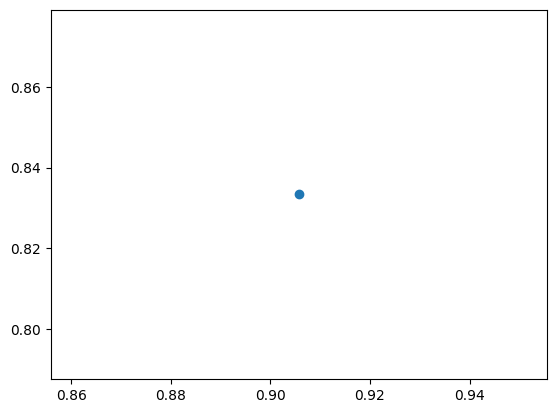

In [28]:
plt.scatter(performance_Xtrain, performance_Xtest)

In [35]:
len(pred)

36